In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Constants

In [3]:
DATA_DIR = "classification_data_HWK1/"
COLS = ["red", "blue","green", "orange", "black", "cyan"]
MARKS = [".","+","*","o","x","^"]

# Data

In [4]:
D = {}
for l in "ABC":
    D[l] = {}
    for t in ["train", "test"]:
        D[l][t] = pd.read_csv(DATA_DIR + "classification" + l + "." + t, sep = "\t", names = ["x1", "x2", "y"])

In [5]:
D['A']['train'].as_matrix()

array([[-3.60340505,  1.3266    ,  1.        ],
       [-4.2190114 ,  2.015     ,  1.        ],
       [-1.51565812,  0.5059    ,  1.        ],
       [-1.16975695,  0.3815    ,  1.        ],
       [ 0.52274116, -0.6572    ,  1.        ],
       [-0.14174035, -0.7083    ,  1.        ],
       [-3.2644966 ,  1.312     ,  1.        ],
       [-1.7093627 ,  0.2236    ,  1.        ],
       [-2.06451872,  0.6392    ,  1.        ],
       [-2.7745778 ,  1.139     ,  1.        ],
       [-4.4637327 ,  1.2861    ,  1.        ],
       [-2.05557939,  0.716     ,  1.        ],
       [-4.93081485,  1.9442    ,  1.        ],
       [-2.78573378,  0.8165    ,  1.        ],
       [-3.78492412,  1.0945    ,  1.        ],
       [-0.023503  , -0.1801    ,  1.        ],
       [-4.0787268 ,  1.6789    ,  1.        ],
       [-4.88879174,  2.2006    ,  1.        ],
       [-4.11260798,  1.3405    ,  1.        ],
       [-5.11303227,  1.578     ,  1.        ],
       [-2.76271871,  0.6868    ,  1.   

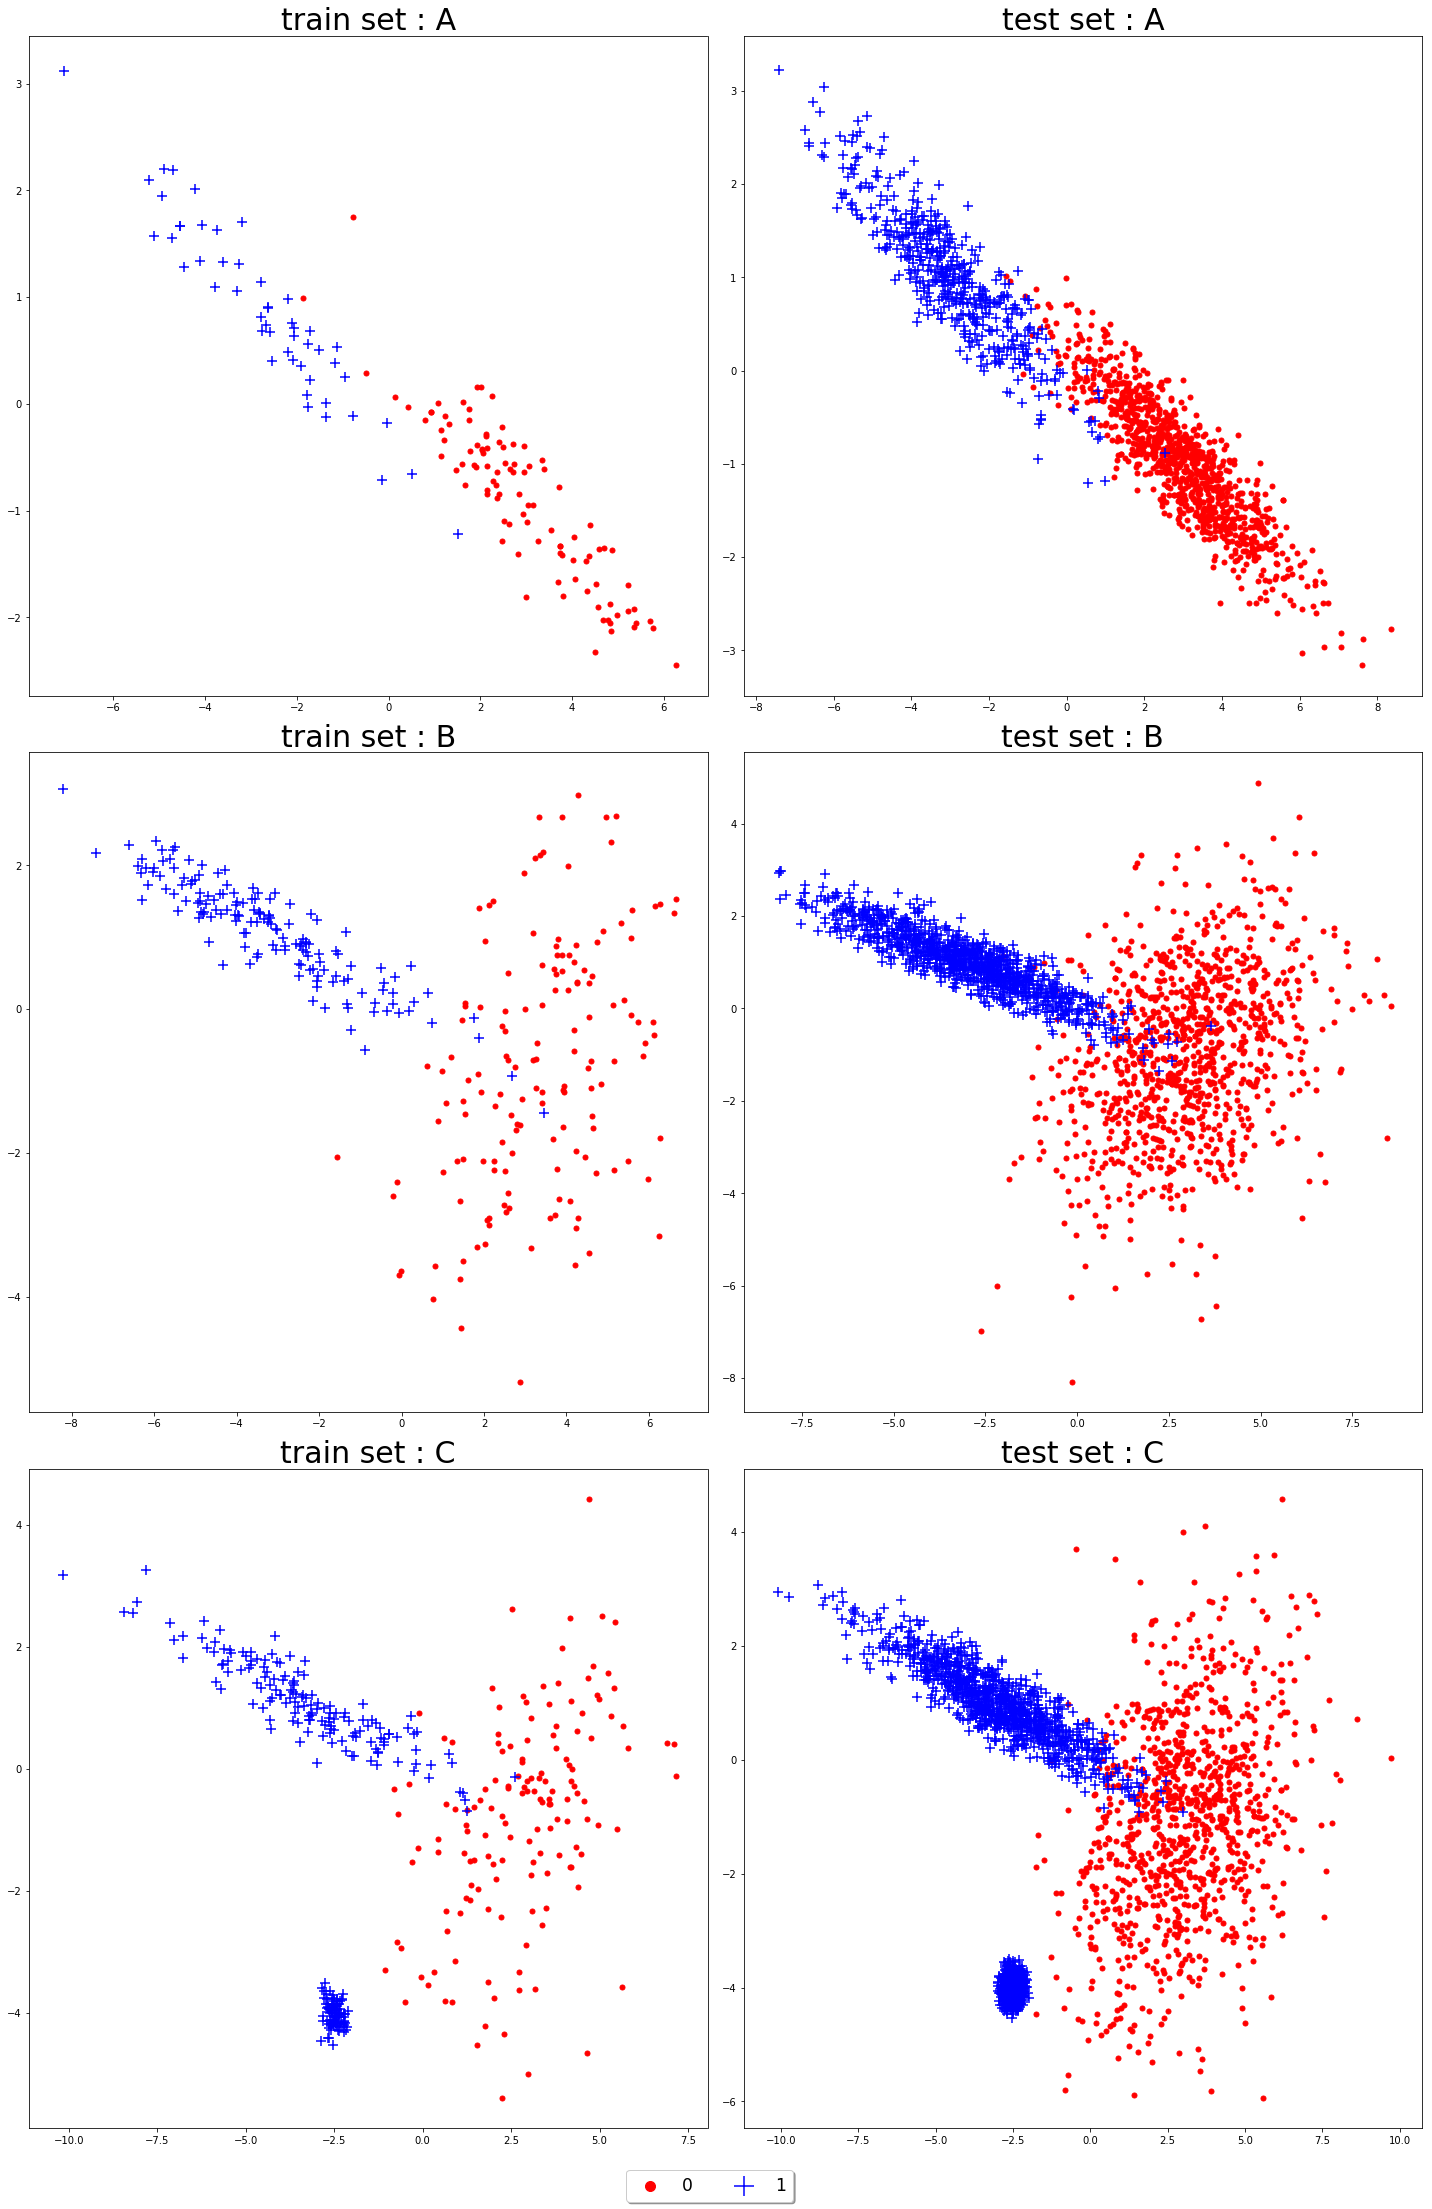

In [147]:
f, ax = plt.subplots(3, 2, figsize = (20, 30))

for k, l in enumerate("ABC"):
    for j, t in enumerate(["train", "test"]):
        x = D[l][t].as_matrix()[:, :2]
        y = D[l][t].as_matrix()[:, 2]
        for i, label in enumerate([0, 1]):
            ax[k][j].scatter(x[y == label, 0], x[y == label, 1],
                             c = COLS[i], marker=MARKS[i],s = 100, label = label)
            ax[k][j].set_title(t + " set : " + l, size = 30);
#             ax[k][j].legend(fontsize = 30);

ax[k][j].legend(loc='upper center', bbox_to_anchor=(-0.05, -0.05),
          fancybox=True, shadow=True, ncol=2, fontsize = 'xx-large', markerscale = 2)
f.tight_layout();

# Plot tools

In [77]:
def make_grid(data=None,xmin=-5,xmax=5,ymin=-5,ymax=5,step=20):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :param data: pour calcluler les bornes du graphe
    :param xmin: si pas data, alors bornes du graphe
    :param xmax:
    :param ymin:
    :param ymax:
    :param step: pas de la grille
    :return: une matrice 2d contenant les points de la grille
    """
    if data is not None:
        xmax, xmin, ymax, ymin = np.max(data[:,0]),  np.min(data[:,0]), np.max(data[:,1]), np.min(data[:,1])
    x, y =np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step), np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y

def plot_data(data, labels = None):
    """
    Affiche des donnees 2D
    :param data: matrice des donnees 2d
    :param labels: vecteur des labels (discrets)
    :return:
    """
    cols,marks = ["red", "blue","green", "orange", "black", "cyan"],[".","+","*","o","x","^"]
    if labels is None:
        plt.scatter(data[:,0],data[:,1], c='r',  marker="x")
        return
    for i,l in enumerate(sorted(list(set(labels.flatten())))):
        plt.scatter(data[labels==l,0],data[labels==l,1],c=cols[i],marker=marks[i])
        
def plot_frontiere(data, f, step = 200):
    """ Trace un graphe de la frontiere de decision de f
    :param data: donnees
    :param f: fonction de decision
    :param step: pas de la grille
    :return:
    """
    grid,x, y = make_grid(data = data, step = step)
    plt.contourf(x, y, f(grid).reshape(x.shape), colors=('gray', 'blue'), levels=[-1,0,1], alpha=0.3)

# Class

## LDA

In [73]:
def Quadratic(datax, mu, sigma):
    """
    Compute the quadratic argument of gausisan density
    """

    return -0.5 * np.dot(np.dot((datax - mu), np.linalg.inv(sigma)), (datax - mu).T)
    

class LDA(object):
    """
    LDA class for binary (0, 1) classification
    """
    def __init__(self):
        self.pi = None
        self.mu_0 = None
        self.mu_1 = None
        self.sigma = None
        return
    def fit(self, datax, datay):
        """
        Compute the MLE of for LDA
        """
        # Length of examples
        N = len(datax)
        # Number of class one
        A = datay.sum()
        # Compute pi MLE
        self.pi = A / N
        # Compute mu MLE
        self.mu_0 = (X[Y == 0].sum(axis = 0) / (N - A)).reshape(1, -1)
        self.mu_1 = (X[Y == 1].sum(axis = 0) / A).reshape(1, -1)
        # Compute Sigma MLE
        sigma_tilda_0 = np.dot((datax[datay == 0] - self.mu_0).T, (datax[datay == 0] - self.mu_0)) / (N - A)
        sigma_tilda_1 = np.dot((datax[datay == 1] - self.mu_1).T, (datax[datay == 1] - self.mu_1)) / A 
        self.sigma = ((N - A) * sigma_tilda_0 + A * sigma_tilda_1) / N
        return self.mu_0, self.mu_1, self.sigma, self.pi
    def predict(self, datax,  threshold = 0.5):
        """
        Compute p(y = 1 | x) and compare it with a treshold to classify the point.
        If p(y = 1 | x) > threshold, returns 1, else return 0
        """
        p = []
        for x in datax:
            current =1 / (1 + (1 - self.pi) / self.pi * np.exp(Quadratic(x.reshape(1, -1),
                                                                self.mu_0,
                                                                self.sigma) 
                                                     - Quadratic(x.reshape(1, -1),
                                                                self.mu_1,
                                                                self.sigma)))
            current = 1 if current >= threshold else 0
            p.append(current)
        return np.array(p).reshape(-1, 1)
    def score(self, datax, datay,):
        """
        Given data and their label, return the correct percentage of classification
        """
        return (self.predict(datax) == datay.reshape(-1 ,1)).sum() / len(datay)

## Logistic regression

In [306]:
class Logistic_reg(object):
    """
    Logistic regression class for binary (0, 1) classification
    """
    def __init__(self):
        self.w = None
        self.w_histo = None
        return
    def sigmoid(w, x):
        """
        Compute the sigmoid value of a given x, with parameter w
        if n dimension of x
        x : N x n
        w : n x 1
        """
        return 1 / (1 + np.exp(-np.dot(x, w)))
    def update(self, w, datax, datay):
        """
        Compute one iteration of the IRLS algorithm
        """
        inv = np.linalg.inv(np.dot(np.dot(datax.T,
                                   np.diagflat(sigmoid(w, datax) * (1 - sigmoid(w, datax)))),
                                   datax))
        temp = w + np.dot(np.dot(inv, datax.T),
                          (datay.reshape(-1 ,1) -  sigmoid(w, datax).reshape(-1 ,1)))
        print (w.shape)
        self.w_histo = np.hstack((self.w_histo, temp))
        return temp
    def fit(self, datax, datay, threshold = 10e-7, niter = 100):
        """
        IRLS Algorithm of a logistic regression with an affine function.
        Call the update method for every iteration step
        """
        # Length and dimension of examples
        N, D = datax.shape
        # Add one dimension of ones in datax to simulates the b of the affine function
        X = np.hstack((datax, np.array([1] * N).reshape(-1 ,1)))
        # Random initialization of w
        self.w = np.random.rand(D + 1).reshape(-1 ,1)
        self.w_histo = self.w
        print ("Initialisation of w\n", self.w)
        # diff
        diff = 1
        while (diff < threshold or niter > 0):
            self.w = self.update(self.w, X, datay)
            diff = np.linalg.norm(self.w - self.w_histo[-2])
            niter -= 1
        return self.w
    def predict(self, datax,  threshold = 0.5):
        """
        Compute p(y = 1 | x) and compare it with a treshold to classify the point.
        If p(y = 1 | x) > threshold, returns 1, else return 0
        """
        p = []
        for x in datax:
            current =1 / (1 + (1 - self.pi) / self.pi * np.exp(Quadratic(x.reshape(1, -1),
                                                                self.mu_0,
                                                                self.sigma) 
                                                     - Quadratic(x.reshape(1, -1),
                                                                self.mu_1,
                                                                self.sigma)))
            current = 1 if current >= threshold else 0
            p.append(current)
        return np.array(p).reshape(-1, 1)
    def score(self, datax, datay,):
        """
        Given data and their label, return the correct percentage of classification
        """
        return (self.predict(datax) == datay.reshape(-1 ,1)).sum() / len(datay)

# Figures

## For the LDA

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


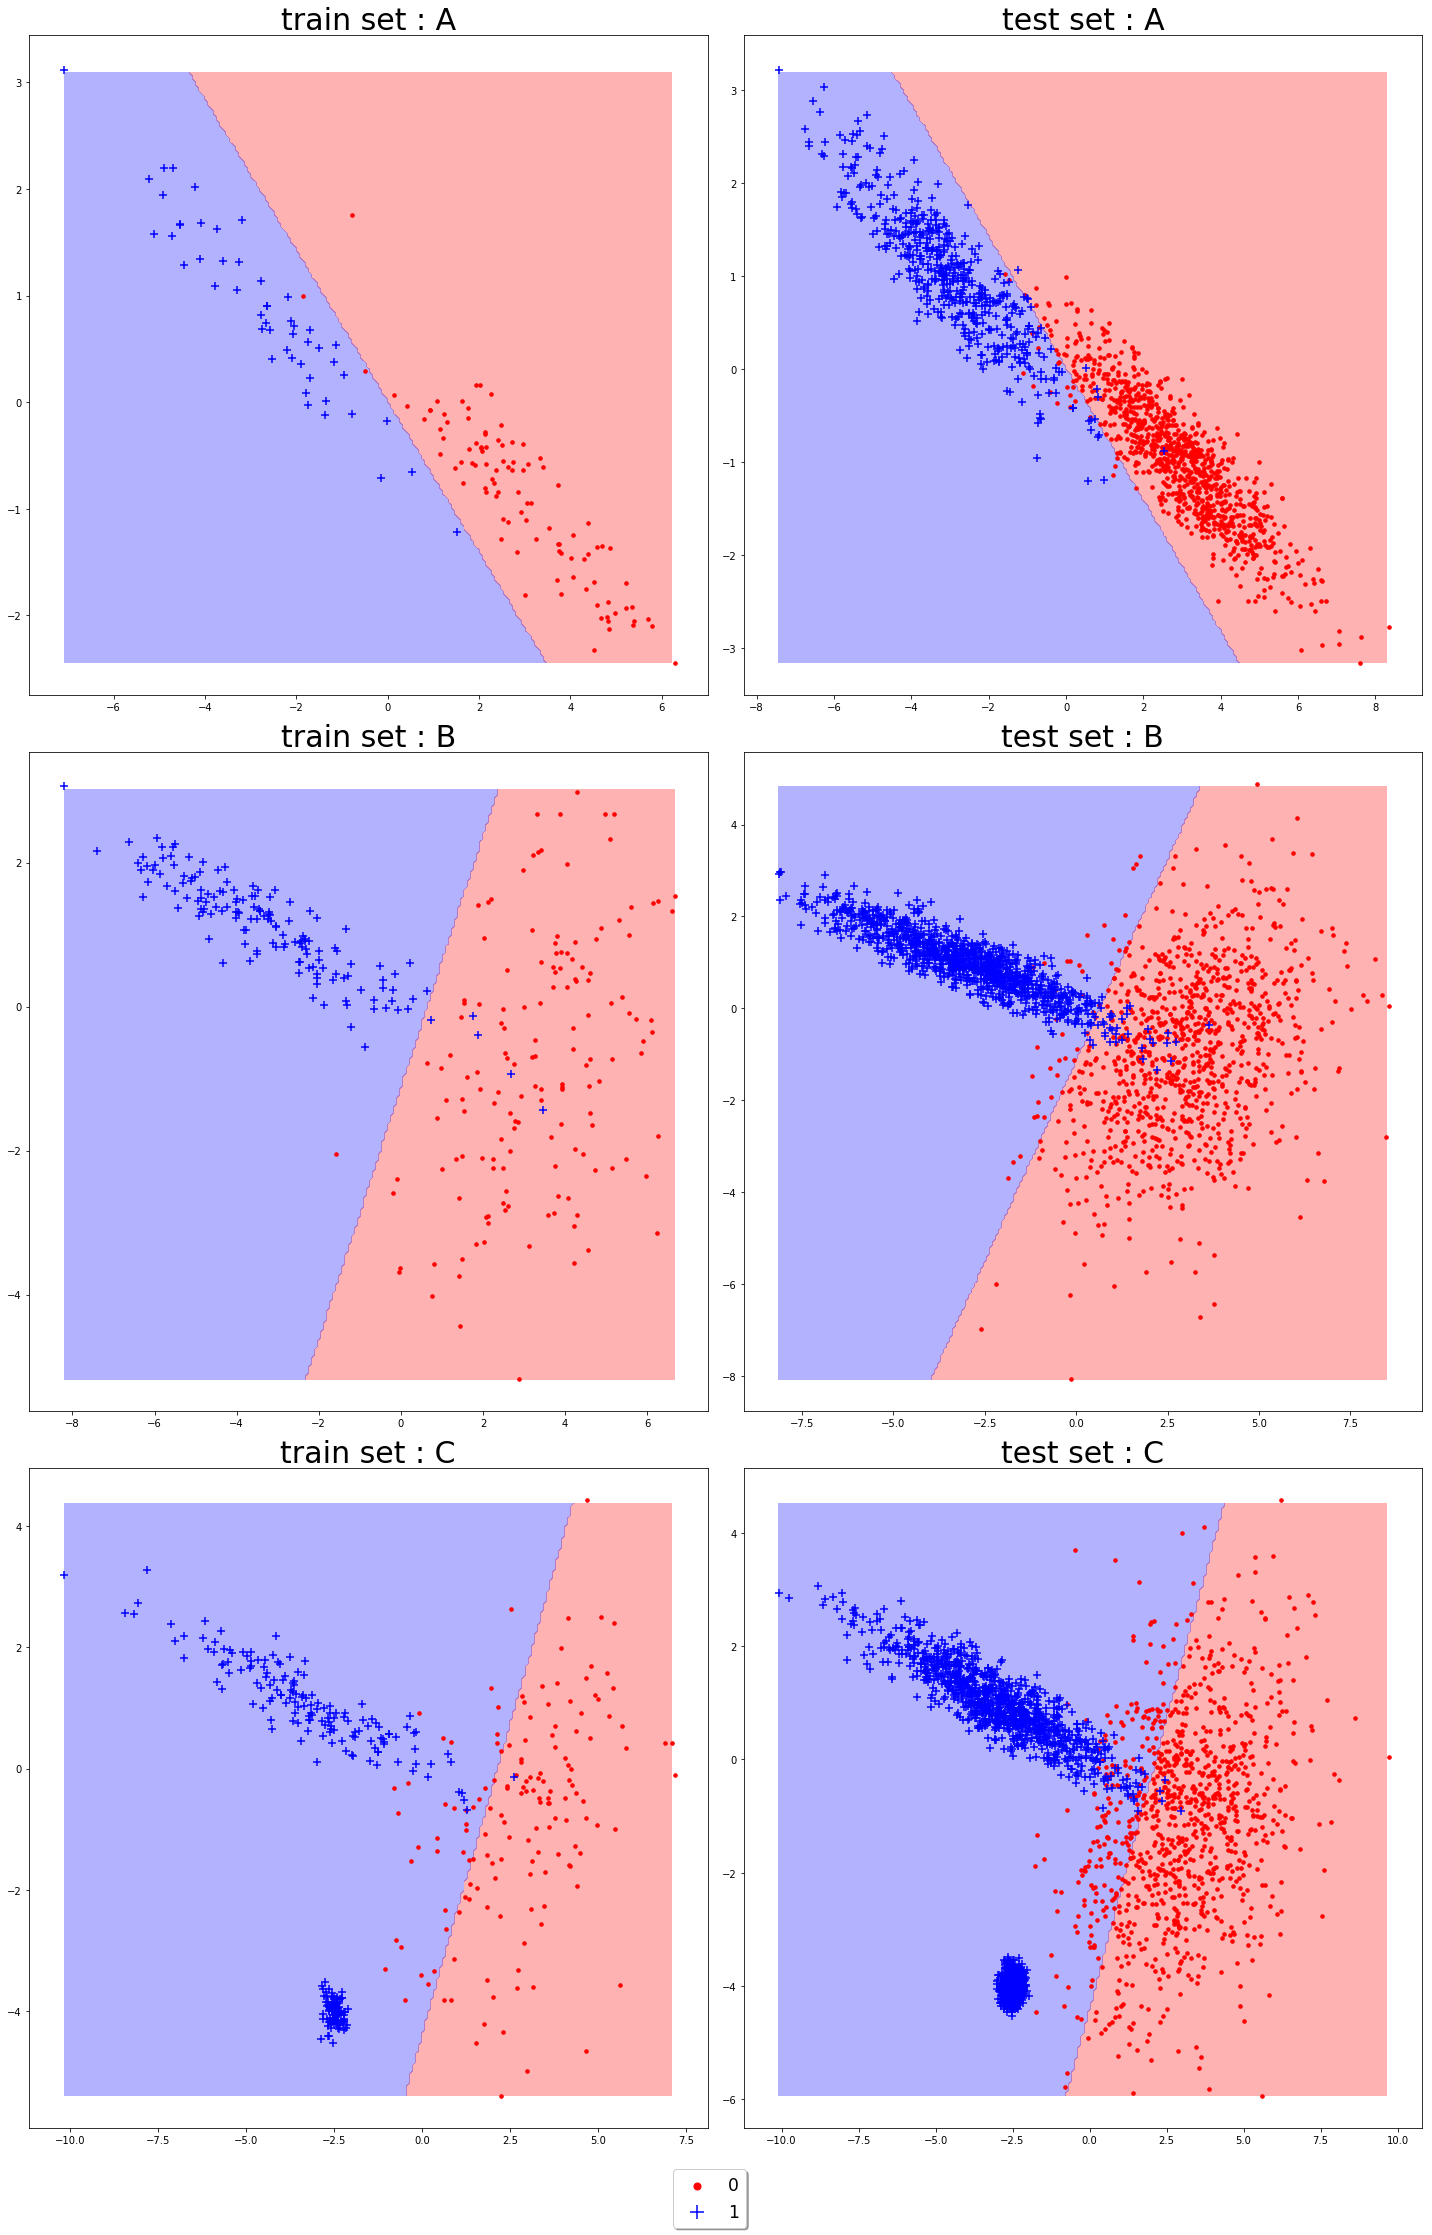

In [153]:
f, ax = plt.subplots(3, 2, figsize = (20, 30))

for k, l in enumerate("ABC"):
    classifier = LDA()
    for j, t in enumerate(["train", "test"]):
        x = D[l][t].as_matrix()[:, :2]
        y = D[l][t].as_matrix()[:, 2]
        # Fit the classifier
        if t == "train":
            classifier.fit(x, y)
        grid, x_grid, y_grid = make_grid(data = x, step = 200)
        ax[k][j].contourf(x_grid, y_grid, classifier.predict(grid).reshape(x_grid.shape),
                          colors = ('red', 'blue'), levels = [-1,0,1], alpha = 0.3,
                          label = "test")
        for i, label in enumerate([0, 1]):
            ax[k][j].scatter(x[y == label, 0], x[y == label, 1],
                             c = COLS[i], marker = MARKS[i], s = 50, label = label)
            ax[k][j].set_title(t + " set : " + l, size = 30);
ax[k][j].legend(loc='upper center', bbox_to_anchor=(-0.05, -0.05),
                fancybox=True, shadow=True, ncol=1, fontsize = 'xx-large',
                markerscale = 2)
                
f.tight_layout();

# Test zone

In [62]:
Xtrain, Ytrain = D['A']['train'].as_matrix()[:, :2], D['A']['train'].as_matrix()[:, 2]
Xtest, Ytest = D['A']['test'].as_matrix()[:, :2], D['A']['test'].as_matrix()[:, 2]

In [63]:
D['A']['train'].as_matrix()

array([[-3.60340505,  1.3266    ,  1.        ],
       [-4.2190114 ,  2.015     ,  1.        ],
       [-1.51565812,  0.5059    ,  1.        ],
       [-1.16975695,  0.3815    ,  1.        ],
       [ 0.52274116, -0.6572    ,  1.        ],
       [-0.14174035, -0.7083    ,  1.        ],
       [-3.2644966 ,  1.312     ,  1.        ],
       [-1.7093627 ,  0.2236    ,  1.        ],
       [-2.06451872,  0.6392    ,  1.        ],
       [-2.7745778 ,  1.139     ,  1.        ],
       [-4.4637327 ,  1.2861    ,  1.        ],
       [-2.05557939,  0.716     ,  1.        ],
       [-4.93081485,  1.9442    ,  1.        ],
       [-2.78573378,  0.8165    ,  1.        ],
       [-3.78492412,  1.0945    ,  1.        ],
       [-0.023503  , -0.1801    ,  1.        ],
       [-4.0787268 ,  1.6789    ,  1.        ],
       [-4.88879174,  2.2006    ,  1.        ],
       [-4.11260798,  1.3405    ,  1.        ],
       [-5.11303227,  1.578     ,  1.        ],
       [-2.76271871,  0.6868    ,  1.   

In [74]:
lda = LDA()
lda.fit(Xtrain, Ytrain)
lda.score(Xtrain, Ytrain)

0.98666666666666669

In [160]:
def sigmoid(w, x):
    """
    Compute the sigmoid value of a given x, with parameter w
    if n dimension of x
    x : N x n
    w : n x 1
    """
    return 1 / (1 + np.exp(-np.dot(x, w)))

In [171]:
wt = np.array([1, 1, 1]).reshape(-1 ,1)
wt

array([[1],
       [1],
       [1]])

In [174]:
Xt = np.hstack((Xtrain, np.array([1]*len(Xtrain)).reshape(-1 ,1)))
Xt

array([[-3.60340505,  1.3266    ,  1.        ],
       [-4.2190114 ,  2.015     ,  1.        ],
       [-1.51565812,  0.5059    ,  1.        ],
       [-1.16975695,  0.3815    ,  1.        ],
       [ 0.52274116, -0.6572    ,  1.        ],
       [-0.14174035, -0.7083    ,  1.        ],
       [-3.2644966 ,  1.312     ,  1.        ],
       [-1.7093627 ,  0.2236    ,  1.        ],
       [-2.06451872,  0.6392    ,  1.        ],
       [-2.7745778 ,  1.139     ,  1.        ],
       [-4.4637327 ,  1.2861    ,  1.        ],
       [-2.05557939,  0.716     ,  1.        ],
       [-4.93081485,  1.9442    ,  1.        ],
       [-2.78573378,  0.8165    ,  1.        ],
       [-3.78492412,  1.0945    ,  1.        ],
       [-0.023503  , -0.1801    ,  1.        ],
       [-4.0787268 ,  1.6789    ,  1.        ],
       [-4.88879174,  2.2006    ,  1.        ],
       [-4.11260798,  1.3405    ,  1.        ],
       [-5.11303227,  1.578     ,  1.        ],
       [-2.76271871,  0.6868    ,  1.   

In [179]:
l = sigmoid(wt, Xt)
l

array([[ 0.21809457],
       [ 0.23076238],
       [ 0.49756049],
       [ 0.55273886],
       [ 0.70381706],
       [ 0.53741981],
       [ 0.27838301],
       [ 0.38089227],
       [ 0.39524473],
       [ 0.34624687],
       [ 0.10177714],
       [ 0.41591165],
       [ 0.12061546],
       [ 0.27503325],
       [ 0.15572007],
       [ 0.68920324],
       [ 0.1978436 ],
       [ 0.15601379],
       [ 0.14528038],
       [ 0.07343849],
       [ 0.25427914],
       [ 0.04904833],
       [ 0.413805  ],
       [ 0.52699703],
       [ 0.10213403],
       [ 0.32393471],
       [ 0.13192812],
       [ 0.32951657],
       [ 0.24382374],
       [ 0.32509859],
       [ 0.28431035],
       [ 0.33736253],
       [ 0.13302169],
       [ 0.332881  ],
       [ 0.22223775],
       [ 0.49424596],
       [ 0.1818347 ],
       [ 0.44963828],
       [ 0.78696966],
       [ 0.38083019],
       [ 0.24723084],
       [ 0.10575857],
       [ 0.45444148],
       [ 0.599754  ],
       [ 0.41460038],
       [ 0

In [181]:
np.diagflat(l)

array([[ 0.21809457,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.23076238,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.49756049, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.9883101 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.97816589,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.93679148]])

In [307]:
lr = Logistic_reg()
lr.fit(Xtrain, Ytrain)

Initialisation of w
 [[ 0.08017202]
 [ 0.05704373]
 [ 0.8626614 ]]
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)


/home/vmatthys/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


LinAlgError: Singular matrix

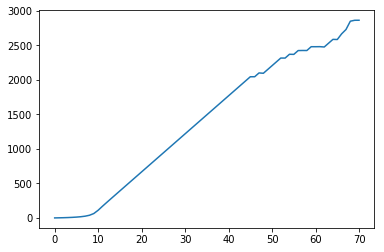

In [313]:
plt.plot(np.linalg.norm(lr.w_histo, axis = 0))

In [294]:
len(lr.w_histo)

76

In [300]:
lr.w_histo[30]

array([[ -680.18498998],
       [-1178.41496588],
       [ -112.84810688]])

In [312]:
np.linalg.norm(lr.w_histo, axis = 0)

array([  8.68254709e-01,   2.30692625e+00,   3.86290979e+00,
         5.92290083e+00,   8.79138767e+00,   1.26537807e+01,
         1.79825370e+01,   2.60219835e+01,   3.93137667e+01,
         6.43056404e+01,   1.11945902e+02,   1.70227766e+02,
         2.26481775e+02,   2.81948900e+02,   3.37171704e+02,
         3.92322201e+02,   4.47453220e+02,   5.02579994e+02,
         5.57706409e+02,   6.12833188e+02,   6.67960306e+02,
         7.23087636e+02,   7.78215080e+02,   8.33342582e+02,
         8.88470112e+02,   9.43597657e+02,   9.98725209e+02,
         1.05385276e+03,   1.10898032e+03,   1.16410788e+03,
         1.21923544e+03,   1.27436300e+03,   1.32949057e+03,
         1.38461813e+03,   1.43974569e+03,   1.49487326e+03,
         1.55000082e+03,   1.60512838e+03,   1.66025595e+03,
         1.71538352e+03,   1.77051108e+03,   1.82563865e+03,
         1.88076621e+03,   1.93589378e+03,   1.99102135e+03,
         2.04614891e+03,   2.04626208e+03,   2.10138964e+03,
         2.09654748e+03,